## Amazon Alexa Reviews

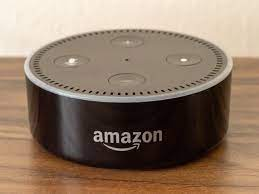

#### Problem Statement

The Amazon Alexa reviews dataset consists of approximately 3000 reviews and corresponding star ratings of various Alexa products Alexa Echo, Echo Dots etc.

Since customer reviews are vailable in text format along with ratings (1-5), we can treat this as multiclass classification problem and build the machine learning model to predict the ratings given any customer review.

In this notebook, we will convert the problem into binary classification problem by encoding ratings as below:
* Rating 0: All the ratings below 3 (i.e. 1,2) - Negative Sentiment
* Rating 1: Ratings >= 3 (i.e. 3,4,5) - Positive Sentiment

Above problem is also called as **Sentiment Analysis or opinion mining** which extensively uses natural language processing (NLP) techniques to analyze the text in order to detemine positive or negative sentiment within it.

### Import Libraries

In [ ]:
import os

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import string

In [ ]:
ROOT_DIR = '../input'
DATA_DIR = os.path.join(ROOT_DIR,'amazon-alexa-reviews')

In [ ]:
print(DATA_DIR)

### Import Amazon Alexa Reviews data

In [ ]:
# Read the source data present in .tsv format
reviews_df = pd.read_csv(os.path.join(DATA_DIR,'amazon_alexa.tsv'), sep = '\t')

In [ ]:
print('Number of observations: ',reviews_df.shape[0])
print('Number of features: ',reviews_df.shape[1])

In [ ]:
# Print DataFrame column names
reviews_df.columns

In [ ]:
# Display top 5 instaces or observations
reviews_df.head(n = 5)

In [ ]:
# Display bottom 5 instances or observations
reviews_df.tail(n = 5)

In [ ]:
reviews_df.index

In [ ]:
# To check missing value count per feature
reviews_df.isnull().sum()

In [ ]:
# Print the metadata of Pandas DataFrame
reviews_df.info()

### Exploratory Data Analysis (EDA)

In [ ]:
reviews_df['rating'].value_counts()

In [ ]:
reviews_df['date'].value_counts().head(n = 5)

In [ ]:
reviews_df['variation'].value_counts()

In [ ]:
reviews_df['feedback'].value_counts()

In [ ]:
reviews_df['verified_reviews'].iloc[19]

In [ ]:
reviews_df['verified_reviews'].iloc[67]

In [ ]:
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].apply(lambda x: x.lower())

In [ ]:
reviews_df['verified_reviews'].iloc[199]

In [ ]:
def remove_punctuation(text):
    return "".join([word for word in text if word not in string.punctuation])

In [ ]:
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].apply(lambda x: remove_punctuation(x))

In [ ]:
reviews_df['verified_reviews'].iloc[19]

In [ ]:
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].str.strip()

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].apply(lambda x: word_tokenize(x))

In [ ]:
reviews_df['verified_reviews'].iloc[19][0:9]

In [ ]:
from nltk.corpus import stopwords

In [ ]:
corpus = []

In [ ]:
for i in range(0, len(reviews_df)):
    subset = [x for x in reviews_df['verified_reviews'].iloc[i] if x not in stopwords.words('english')]
    subset = ' '.join(subset)
    corpus.append(subset)

In [ ]:
corpus[0:4]

In [ ]:
from nltk.stem.snowball import SnowballStemmer
ss = SnowballStemmer('english')

In [ ]:
s_corpus = []
for sent in corpus:    
    s_text = [ss.stem(word) for word in sent.split()]
    s_text = ' '.join(s_text)
    s_corpus.append(s_text)

In [ ]:
s_corpus[0:4]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=5000)

In [ ]:
X = cv.fit_transform(s_corpus).toarray()

In [ ]:
y = reviews_df['feedback']

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
print(X_smote.shape)
print(y_smote.shape)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state=33)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_model = MultinomialNB().fit(X_train,y_train)

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
roc_auc_score(y_test, y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr_model = lr.fit(X_train,y_train)

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
accuracy_score(y_pred,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
f1_score(y_test, y_pred)

In [ ]:
roc_auc_score(y_test, y_pred)